# **1. IMPORT DATA**


In [ ]:
import pandas as pd

Pandas adalah librari analisis data yang memiliki struktur data yang diperlukan untuk membersihkan data mentah ke dalam sebuah bentuk yang cocok untuk analisis (yaitu tabel).

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
       print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
      

Saving covid_jakarta.csv to covid_jakarta.csv
User uploaded file "covid_jakarta.csv" with length 27095 bytes


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid_jakarta.csv to covid_jakarta.csv


**Read Data CSV**

In [ ]:
df = pd.read_csv('/content/covid_jakarta.csv', error_bad_lines=False, sep = ';')

In [ ]:
df

,ID_KEL,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,POSITIF,Dirawat,Sembuh,Meninggal,mortality_rate,recovery_rate
0,3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,1960,2,1921,27,"0,01377551","0,980102041"
1,3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,1859,1,1811,34,"0,018289403","0,974179666"
2,3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,2143,0,2105,34,"0,015865609","0,982267849"
3,3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,873,1,847,18,"0,020618557","0,97021764"
4,3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,3026,1,2988,31,"0,010244547","0,987442168"
...,...,...,...,...,...,...,...,...,...,...,...
264,3175011006,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU SELATAN,3674,7,3580,72,"0,019597169","0,974414807"
265,3175011002,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU UTARA,2328,3,2255,60,"0,025773196","0,968642612"
266,3171031008,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,UTAN PANJANG,1985,4,1933,36,"0,01813602","0,973803526"
267,3172021007,DKI JAKARTA,JAKARTA UTARA,TANJUNG PRIOK,WARAKAS,3004,5,2945,44,"0,014647137","0,980359521"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_KEL          269 non-null    object
 1   Nama_provinsi   269 non-null    object
 2   nama_kota       269 non-null    object
 3   nama_kecamatan  269 non-null    object
 4   nama_kelurahan  269 non-null    object
 5   POSITIF         269 non-null    int64 
 6   Dirawat         269 non-null    int64 
 7   Sembuh          269 non-null    int64 
 8   Meninggal       269 non-null    int64 
 9   mortality_rate  269 non-null    object
 10  recovery_rate   269 non-null    object
dtypes: int64(4), object(7)
memory usage: 23.2+ KB


In [ ]:
import warnings
warnings.filterwarnings("ignore")

**Formatting Data : Data Type**

In [ ]:
df['mortality_rate'] = df['mortality_rate'].str.replace(',','.').astype(float)
df['recovery_rate'] = df['recovery_rate'].str.replace(',','.').astype(float)

In [ ]:
df

,ID_KEL,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,POSITIF,Dirawat,Sembuh,Meninggal,mortality_rate,recovery_rate
0,3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,1960,2,1921,27,0.013776,0.980102
1,3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,1859,1,1811,34,0.018289,0.974180
2,3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,2143,0,2105,34,0.015866,0.982268
3,3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,873,1,847,18,0.020619,0.970218
4,3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,3026,1,2988,31,0.010245,0.987442
...,...,...,...,...,...,...,...,...,...,...,...
264,3175011006,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU SELATAN,3674,7,3580,72,0.019597,0.974415
265,3175011002,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU UTARA,2328,3,2255,60,0.025773,0.968643
266,3171031008,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,UTAN PANJANG,1985,4,1933,36,0.018136,0.973804
267,3172021007,DKI JAKARTA,JAKARTA UTARA,TANJUNG PRIOK,WARAKAS,3004,5,2945,44,0.014647,0.980360


**Indexing Data Before Clustering**

In [ ]:
df = df.set_index("ID_KEL")
df.head()

,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,POSITIF,Dirawat,Sembuh,Meninggal,mortality_rate,recovery_rate
ID_KEL,,,,,,,,,,
3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,1960,2,1921,27,0.013776,0.980102
3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,1859,1,1811,34,0.018289,0.974180
3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,2143,0,2105,34,0.015866,0.982268
3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,873,1,847,18,0.020619,0.970218
3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,3026,1,2988,31,0.010245,0.987442


#**2. CLUSTERING K-MEANS**

**Importing Library**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
std=StandardScaler()

Standard Scaling since K-Means Clustering is a distance based alogrithm. 

In general, attribute scaling is important to be applied with K-means. Most of the time, the standard Euclidean distance is used (as a distance function of K-means) with the assumption that the attributes are normalized. 

In [ ]:
X=df[["mortality_rate","recovery_rate"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
X=std.fit_transform(X)

**Calculating k numbers using Elbow and Silhouette**

In [ ]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

**Importing Visualization Library**

*   Matplotlib adalah pustaka visualisasi data multiplatform yang dibangun di atas array NumPy

*   NumPy (Numerical Python) adalah library Python yang fokus pada scientific computing. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0.5, 1.0, 'Silhouette Score Method')

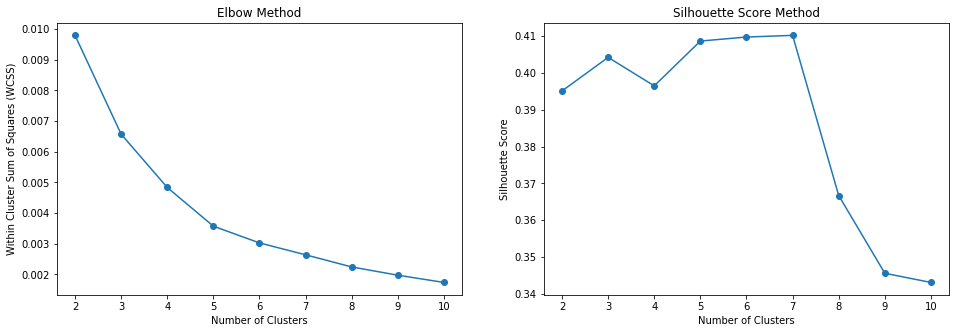

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
x=np.arange(2,11)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")
x=np.arange(2,11)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")

In [ ]:
clf_final=KMeans(n_clusters=3,init='k-means++',random_state=6)
clf_final.fit(X)

KMeans(n_clusters=3, random_state=6)

In [ ]:
df["Clusters"]=clf_final.predict(X)

**Summary of Clusters**

In [ ]:
cluster_summary=pd.concat([df[df["Clusters"]==1].head(15),df[df["Clusters"]==2].head(15),df[df["Clusters"]==0].head(15)])
cluster_summary.style.background_gradient(cmap='Reds')

,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,POSITIF,Dirawat,Sembuh,Meninggal,mortality_rate,recovery_rate,Clusters
ID_KEL,,,,,,,,,,,
3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,1960,2,1921,27,0.013776,0.980102,1
3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,2143,0,2105,34,0.015866,0.982268,1
3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,3026,1,2988,31,0.010245,0.987442,1
3175051002,DKI JAKARTA,JAKARTA TIMUR,PASAR REBO,BARU,2693,3,2643,41,0.015225,0.981433,1
3174011005,DKI JAKARTA,JAKARTA SELATAN,TEBET,BUKIT DURI,2403,1,2354,33,0.013733,0.979609,1
3175061007,DKI JAKARTA,JAKARTA TIMUR,CAKUNG,CAKUNG BARAT,2118,2,2082,27,0.012748,0.983003,1
3175041007,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,CAWANG,3219,2,3169,42,0.013048,0.984467,1
3175101008,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,CEGER,2087,2,2049,30,0.014375,0.981792,1
3175091002,DKI JAKARTA,JAKARTA TIMUR,CIRACAS,CIBUBUR,5991,7,5884,75,0.012519,0.982140,1


In [ ]:
print("Average Mortality Rate of Cluster 0: ",df[df["Clusters"]==0]["mortality_rate"].mean())
print("Average Recovery Rate of Cluster 0: ",df[df["Clusters"]==0]["recovery_rate"].mean())
print("Average Mortality Rate of Cluster 1: ",df[df["Clusters"]==1]["mortality_rate"].mean())
print("Average Recovery Rate of Cluster 1: ",df[df["Clusters"]==1]["recovery_rate"].mean())
print("Average Mortality Rate of Cluster 2: ",df[df["Clusters"]==2]["mortality_rate"].mean())
print("Average Recovery Rate of Cluster 2: ",df[df["Clusters"]==2]["recovery_rate"].mean())


Average Mortality Rate of Cluster 0:  0.017748970083916085
Average Recovery Rate of Cluster 0:  0.9761656033426575
Average Mortality Rate of Cluster 1:  0.012240567266666664
Average Recovery Rate of Cluster 1:  0.9830250226399998
Average Mortality Rate of Cluster 2:  0.020295743411764704
Average Recovery Rate of Cluster 2:  0.9664739909803921


In [ ]:
import seaborn as sns

Seaborn merupakan pustaka visualisasi data pada lingkungan Python ber- sifat sumber terbuka yang berlisensi BSD dan dibangun di atas pustaka matplotlib. Seaborn akan mempermudah kita sebagai analis data untuk memproduksi visualisasi yang indah tanpa kostumisasi rumit seperti yang kita hadapi pada matplotlib.

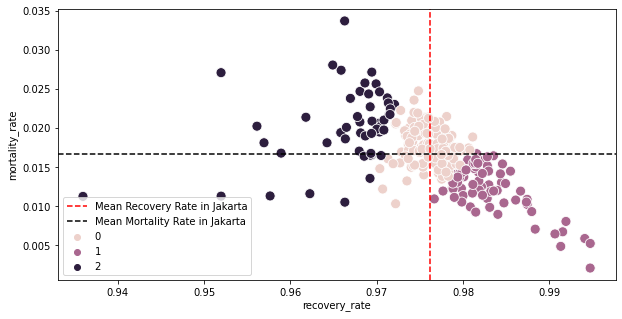

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["recovery_rate"],y=df["mortality_rate"],hue=df["Clusters"],s=100)
plt.axvline((df["recovery_rate"]).mean(),color='red',linestyle="--",label="Mean Recovery Rate in Jakarta")
plt.axhline((df["mortality_rate"]).mean(),color='black',linestyle="--",label="Mean Mortality Rate in Jakarta")
plt.legend()

In [ ]:
print("Few Urban Village belonging to Cluster 0: ",list(df[df["Clusters"]==0].head(10).nama_kelurahan))
print("Few Urban Village belonging to Cluster 1: ",list(df[df["Clusters"]==1].head(10).nama_kelurahan))
print("Few Urban Village belonging to Cluster 2: ",list(df[df["Clusters"]==2].head(10).nama_kelurahan))


Few Urban Village belonging to Cluster 0:  ['ANGKE', 'BANGKA', 'BATU AMPAR', 'BENDUNGAN HILIR', 'BIDARA CINA', 'BUNGUR', 'CAKUNG TIMUR', 'CEMPAKA PUTIH BARAT', 'CEMPAKA PUTIH TIMUR', 'CENGKARENG BARAT']
Few Urban Village belonging to Cluster 1:  ['ANCOL', 'BALE KAMBANG', 'BAMBU APUS', 'BARU', 'BUKIT DURI', 'CAKUNG BARAT', 'CAWANG', 'CEGER', 'CIBUBUR', 'CIGANJUR']
Few Urban Village belonging to Cluster 2:  ['BALI MESTER', 'BINTARO', 'CEMPAKA BARU', 'CIKINI', 'CIPETE SELATAN', 'CIPINANG MUARA', 'DURI KEPA', 'DURI PULO', 'DURI SELATAN', 'DURI UTARA']


Cluster 0 is a set of Urban Village which have really High Mortality Rate and consdierably Low Recovery Rate. Basically few Urban Village among these clusters have seen already the worst of this pandemic but are now recovering with healty Recovery Rate.

Cluster 1 is set of Urban Village which have Low Mortality Rate and really High Recovery Rate. These are the set of Urban Village who has been able to control the COVID-19 by following pandemic controlling practices rigorously.

Cluster 2 is set of Urban Village which have high Mortality Rate and low Recovery Rate. These Urban Village need to pace up their Revovery Rate to get out it, Some thses Urban Village have really high number of Infected Cases but Low Mortality is positive sign out of it.

